<a href="https://colab.research.google.com/github/hwasser95/Udemy/blob/master/day2_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Assignment 2
</br> </br>

I will be explore and “clean” a data set that suffers from a variety of data integrity + usability issues. The data is comprised of more than 12,700 wines, with many of the attributes being related to the chemical composition of the wines




Data Profiling & Domain Knowledge Development¶
Index - This is a unique ID for each wine in the dataset.

Target - This represents the response variable, which is number of cases sold.

Fixed Acidity - The predominant fixed acids found in wines are tartaric, malic, citric, and succinic.
Their respective levels found in wine can vary greatly but in general one would expect to see according to [this link](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity)

1 to 4 g/L tartaric acid
0 to 8 g/L malic acid
0 to 0.5 g/L citric acid
0.5 to 2 g/L succinic acid
1.5 to 14.5 g/L when added up
Volatile Acidity - A measure of the wine's volatile (or gaseous) acids.
The primary volatile acid in wine is acetic acid, which is also the primary acid associated with the smell and taste of vinegar.
Volatile acidity concentration is regulated by the federal Tax and Trade Bureau, the maximum volatile acidity according to [this link](https://extension.psu.edu/volatile-acidity-in-wine#:~:text=Volatile%20acidity%20) is:

1.4 g/L for red wine
1.2 g/L for white wine
Citric Acid - A weak organic acid that occurs naturally in citrus fruits. Part of the acids that compile Fixed Acidity in wine.

Residual Sugar - According to [this link](http://www.moundtop.com/pdf/Winemaking-ResidualSugar.pdf),the Residual Sugar value in wine can vary from 1-2g/L up to 100-200g/L depending on the type of wine.

Chlorides - According to [this link](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0101-20612015000100095#:~:text=Wine%20contains%20from%202%20to,2003%3B%20Maltman%2C%202013), chlorides are a major contributor to saltiness, and wine contains from 2 to 4 g/L of salts of mineral acids, along with some organic acids, and they have a key role on a potential salty taste of a wine.

Free Sulfur Dioxide - The Free Sulfur Dioxide (FSO2) and the pH of a wine determine how much SO2 is available in the active, molecular form to help protect the wine from oxidation and spoilage.

Total Sulfur Dioxide - Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars. The TSO2 level is also regulated by the U.S. Alcohol and Tobacco Tax and Trade Bureau (TTB).
The maximum allowable concentration for a bottled wine according to this [link](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too) is: 350 ppm (mg/L) of TSO2.

Density - We know the density of water is about 1.000 g/mL so we can assume wine density should be around that value. This [link](https://chemwine.com/home/why-is-wine-density-important-1-sl6yl/) provides a formula to estimate a wine’s density.

pH - According to this [link](https://daily.sevenfifty.com/how-winemakers-analyze-ph-and-its-impact-on-wine/) pH levels in wine wine are generally between 3 and 4, with some wines reaching slightly beyond that, to high 2s or low 4s.
For each full point increase in pH, the level of acidity is 10 times more acidic as you go up, so the difference between a pH of 3 and a pH of 4 is very significant.

Sulphates - According to this [link](http://blog.lastbottlewines.com/education/sulphites/), the level of Sulfites in wine can vary from 0.15g/L up to 0.3g/L depending on the type of wine. (Note: Our research did not yield any results for the spelling sulphates, so we inferred that this variable refers to sulfites.)

Alcohol - Non-Alcoholic wine exists and Alcohol content in wine ranges wildly from as low as 5.5% to 23% ABV.
This [link](https://winefolly.com/tips/the-lightest-to-the-strongest-wine/) provides more detailed information regarding different types of wine and their Alcohol content.

Label Appeal - The description we were given for this field was "subjective marketing score that indicates the appeal of the design of the label on the bottle."

Acid Index - Acording to this l[link text](http://www.bcawa.ca/winemaking/acidph.htm)ink, acid index is calculated by subtracting the pH from the Total Acidity (TA). This is differnt than the desription provided with the dataset ("Measures total acidity of wine via a weighted average").

STARS - The description we were given for this field was "wine rating as determined by experts (4 = excellent; 1 = Poor)."

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

filename = "https://raw.githubusercontent.com/hwasser95/Udemy/master/Day2/Day2_Data.csv"
df = pd.read_csv(filename)
df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [40]:
# check the dataset for null values
df.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

I noticed stars has the most missing data. Which is based on expert review. So maybe it was not reviewed.

Before I start to do anything, I will make a copy of the data

In [41]:
df_copy= df.copy()

I noticed a lot of missing data, I’m going to run some test to see if there is any pattern or correlation within the data/missing data 

In [42]:
df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


I noticed some there are some negative numbers. For example, it doesn’t make sense to have a negative PH.

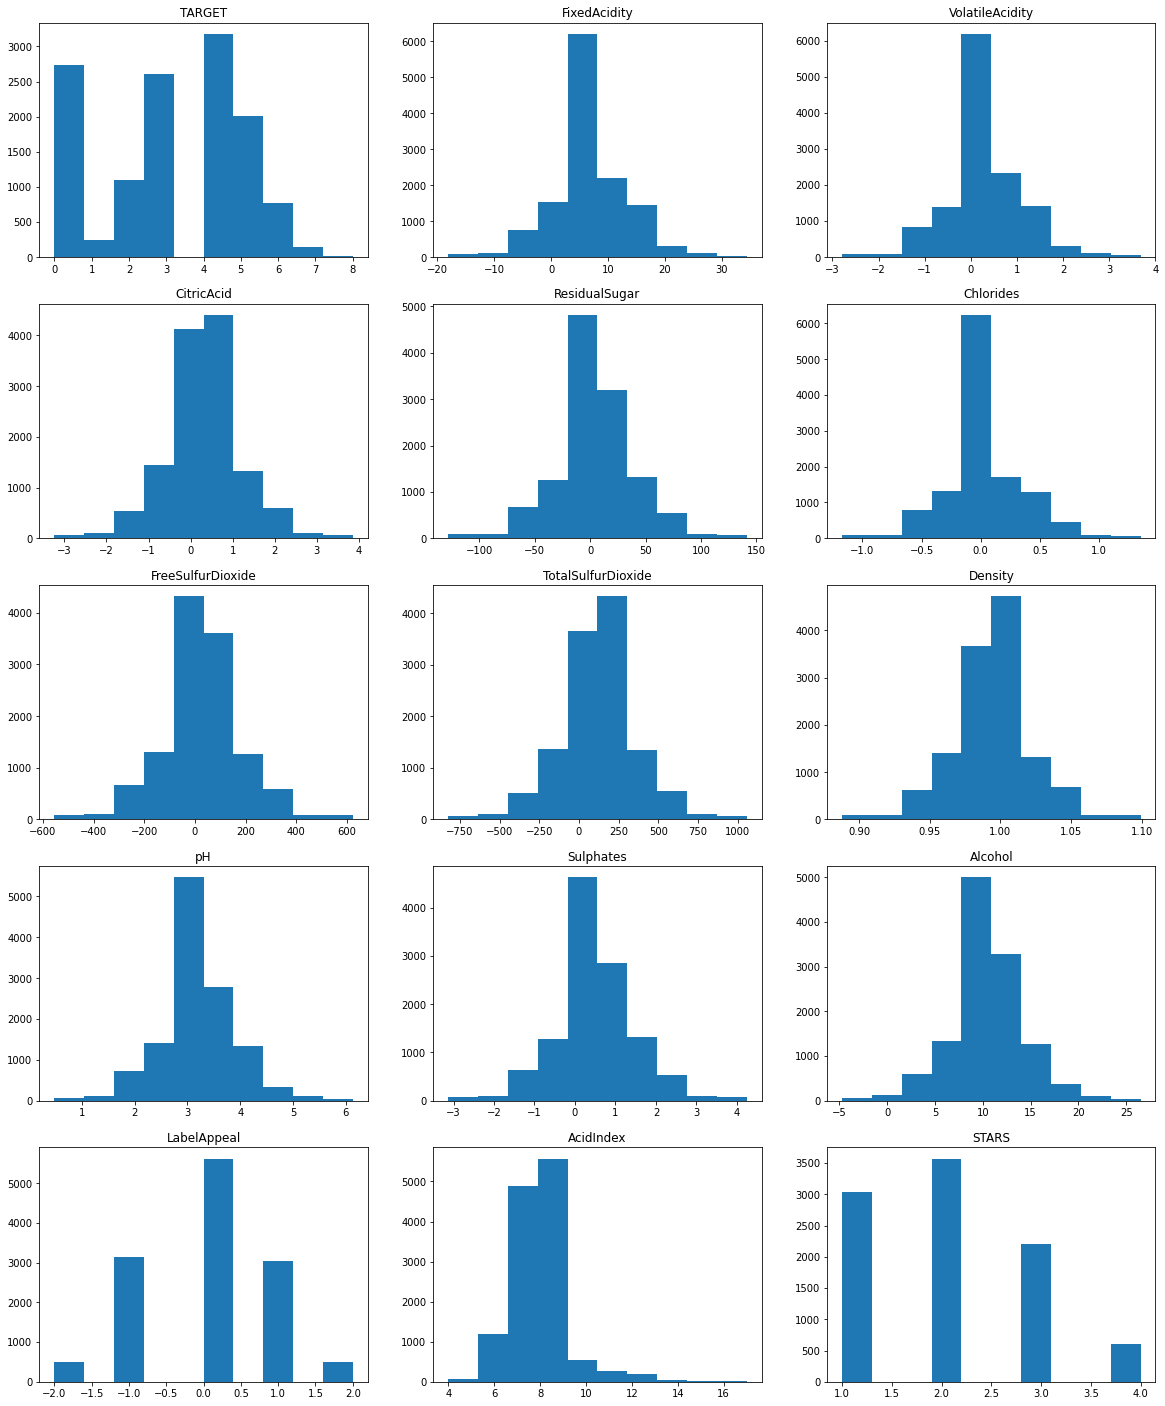

In [43]:
#define a figure to which we will add a histogram for each of our attributes, except for index
plt.figure(figsize=(20,25))

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1
columns=df.columns.tolist()
for k in columns[1:] :   #for each column in the dataframe graph a histogram 
    plt.subplot(5,3,j) 
    plt.hist(df[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

#show results    
plt.show()

From the above histograms, which ignore missing values, the majority of attributes are approximately normally distributed, with the exception of the target, acid index, and stars.



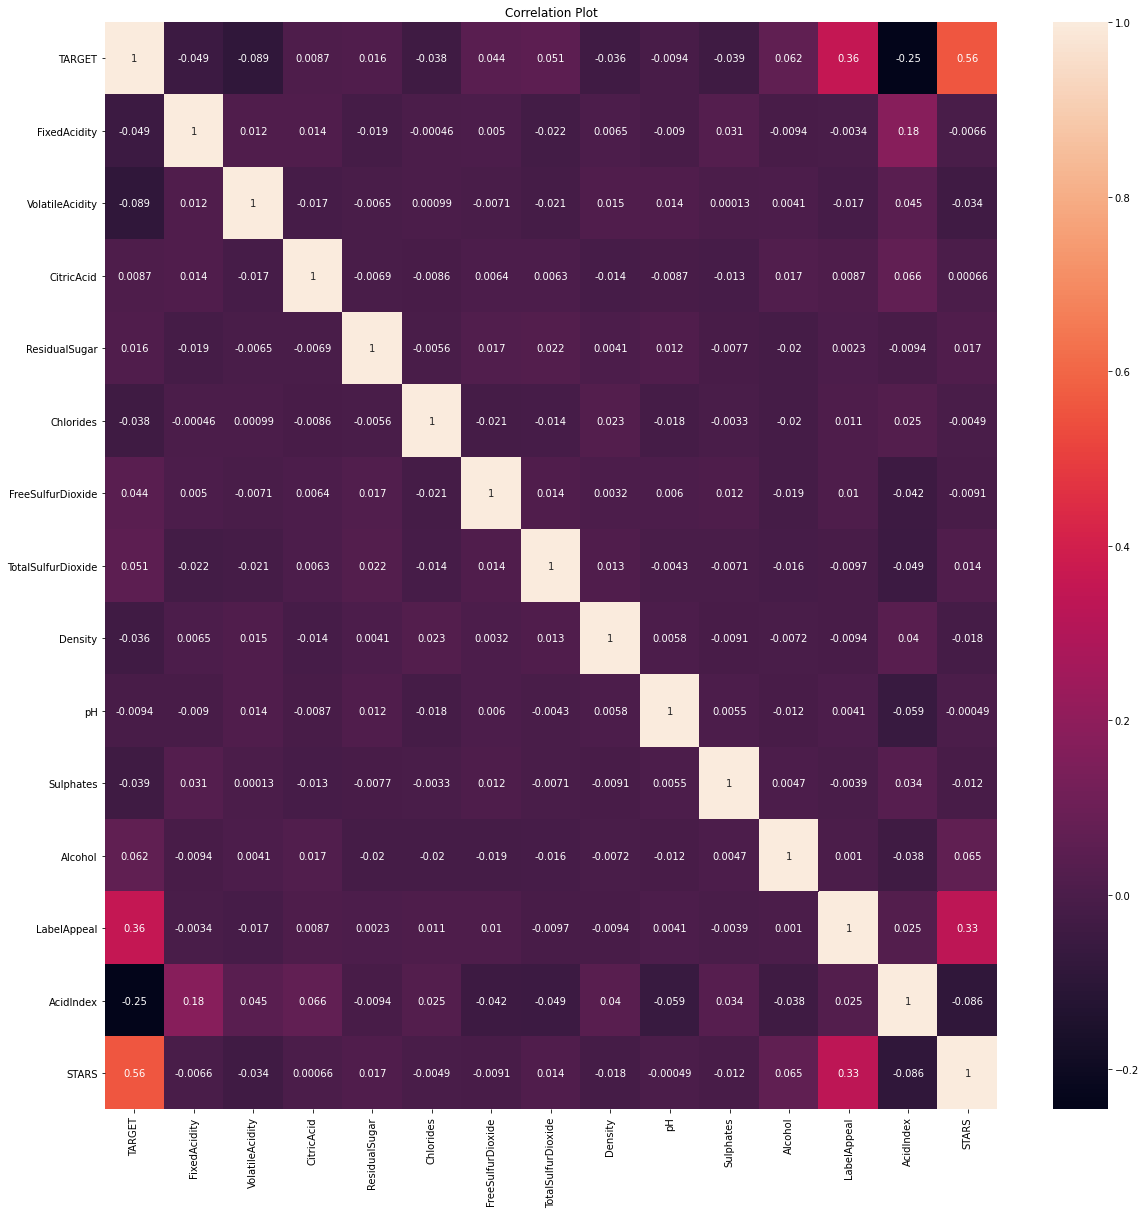

In [44]:
# initial correlation
cor = df.iloc[:,1:].corr()
plt.figure(figsize=(20,20))
plt.title("Correlation Plot")
sns.heatmap(cor,annot=True)
plt.show()

There does not seem to bee any correlation between the attributes, except for target and stars.

I will look at boxplots of the data to see if there are any outliers.



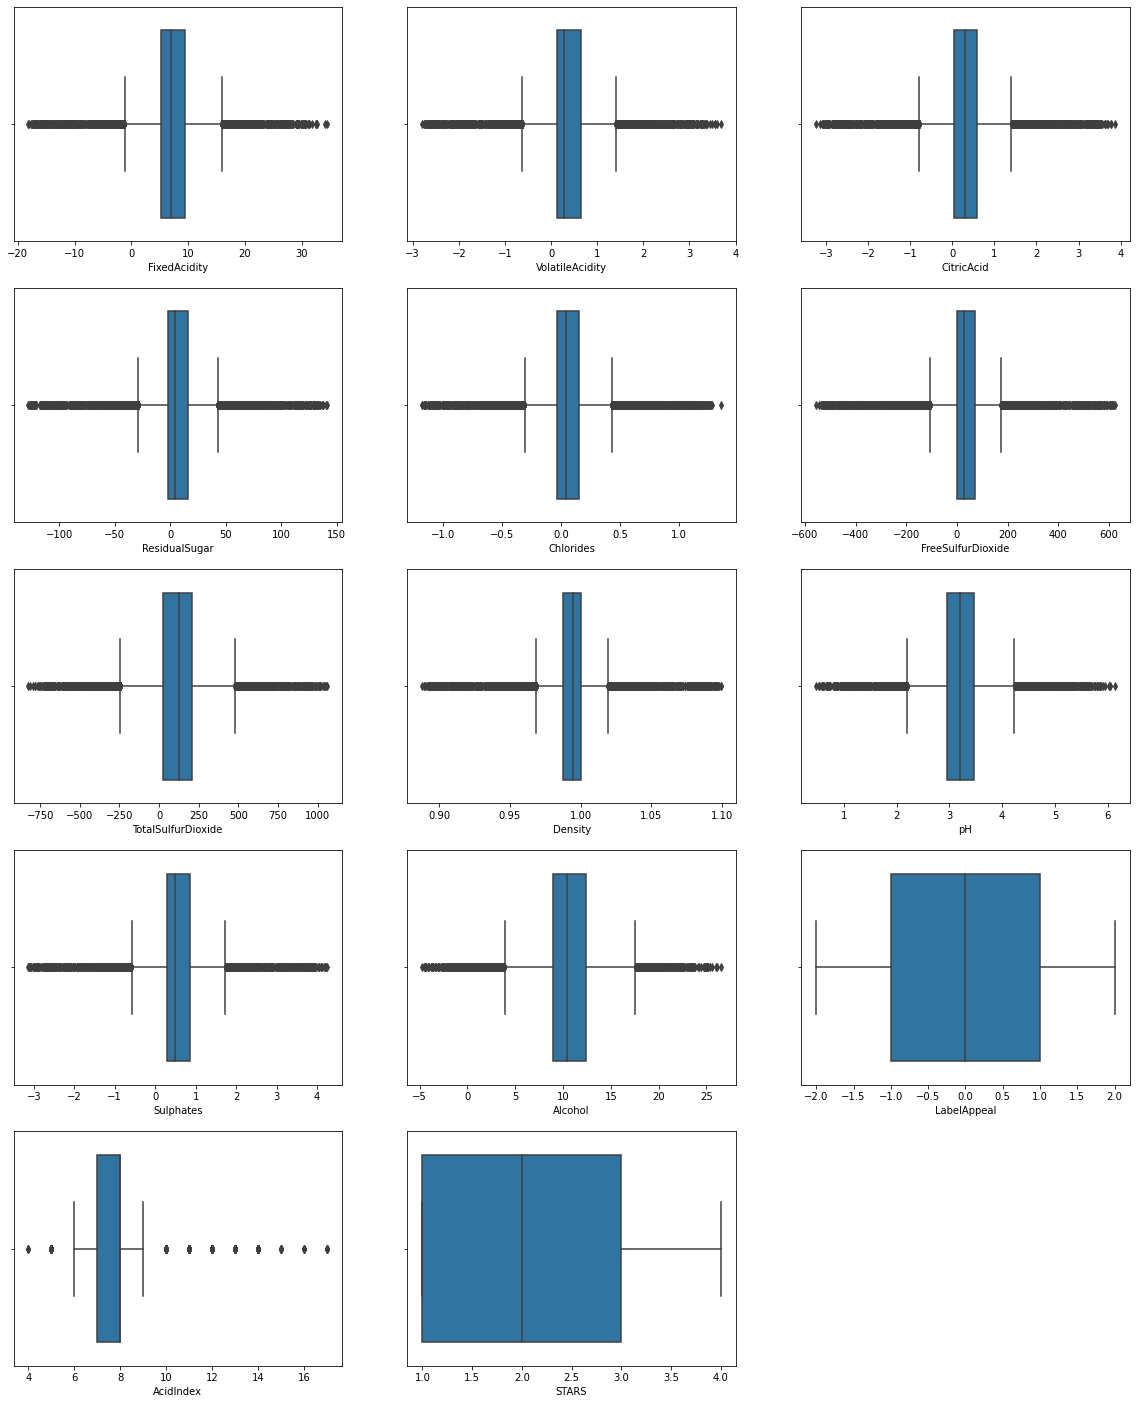

In [45]:
#define a figure to which we will add boxplots of each attribute.
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j=1
columns=wine.columns.tolist()
for k in columns[2:] :   #for each column in the dataframe
    plt.subplot(5,3,j) 
    sns.boxplot(x=k,data=wine)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show()

From the above boxplots I see that most of the attributes have numerous outliers, I am not sure what I'll do with them at this point, there could be good explinations for them

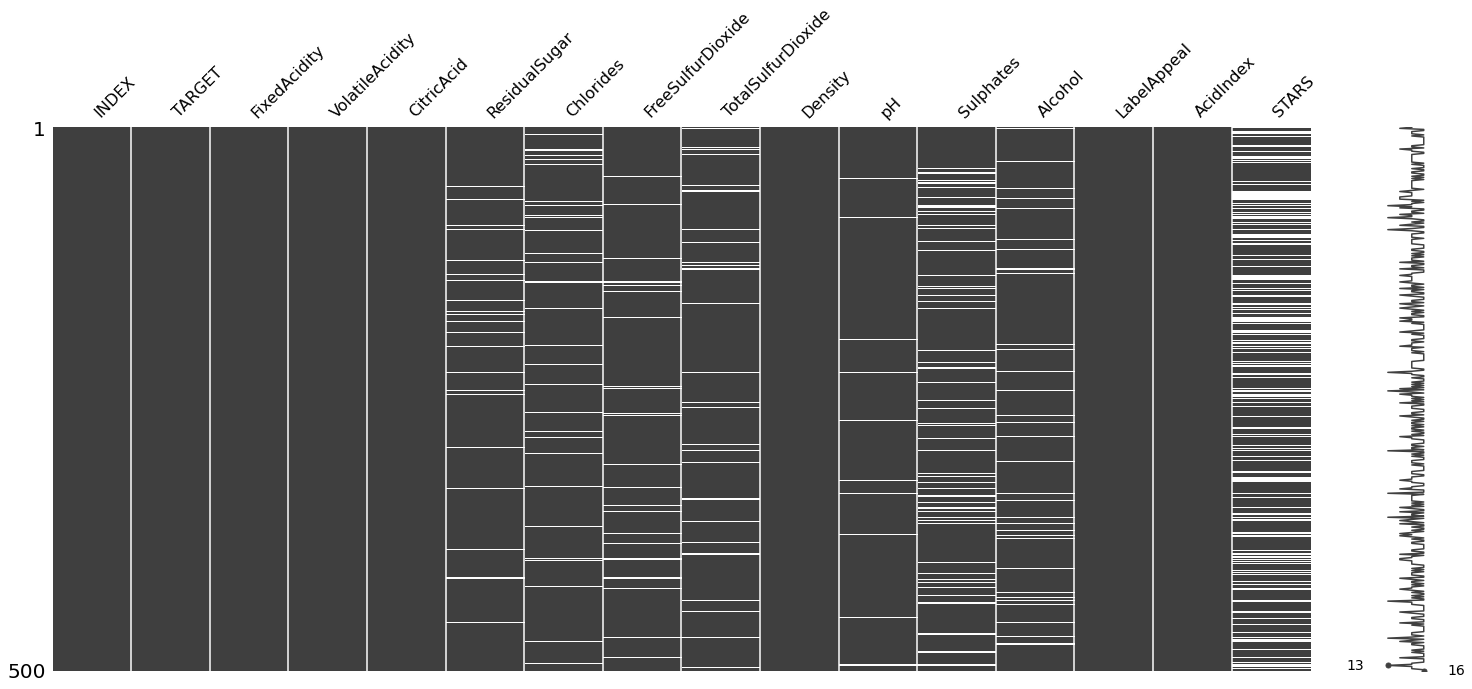

In [46]:
#create a copy of the dataframe
orig_df = df

#visualizing patterns in the missing data 500 random records
ax = msno.matrix(orig_df.sample(500))

The graph shows that there are no big areas of contiguous missing data, suggesting that it is random.



## #2

There are many different types of wine. We have red, white, sparkling, rose, etc.
We have dry sweet, semi-dry etc. I wonder if I could somehow filter the wines, would I get better results.


I’m going to make all the values positive, because it doesn’t make sense to have negative numbers.

In [47]:
#first copy the original data set so that we can perform transformations
absolute=df.copy()

#perform the same transformation on label appeal as above so that we do not have any negative values but do not change the distribution
absolute['LabelAppeal']=wine['LabelAppeal']+2

#get the absolute values of the new data frame to get rid of the negative values
absolute=absolute.abs().copy()

#check results
absolute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  float64
 1   TARGET              12795 non-null  float64
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  float64
 14  AcidIndex           12795 non-null  float64
 15  STARS               9436 non-null   float64
dtypes: f

I’m going to try to separate the wines by their sugar to acid ratio and see if I get some better correlations. 

I found online the way that Riesling  white wines are sorted based on their sugar to acid ratio, I wonder if I filter it according to the formula will it change my data?[link text](https://drinkriesling.com/tasteprofile/thescale)


[link text](https://drive.google.com/file/d/1Kq5iB8mcGcBpYVTJrEm-gHdnVREFDJA2/view?usp=sharing)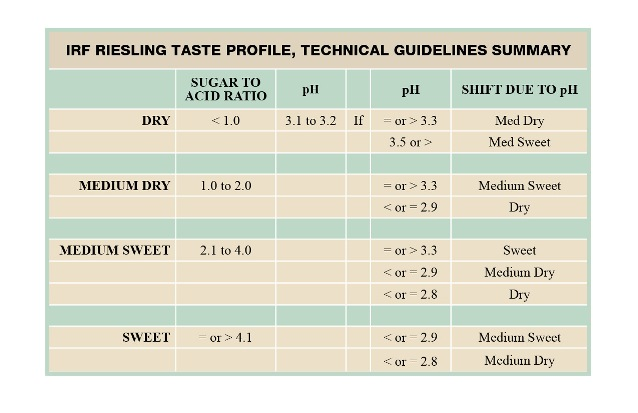

In [54]:
df1=absolute
df1['a']= df1['AcidIndex']/df1['ResidualSugar']
df1=df1[(df1.a>1)]
df1=df1[(df1.a<2)]
df1=df1[(df1.pH>2.9)]
df1=df1[(df1.pH<3.3)]
                             
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 23 to 12757
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               510 non-null    float64
 1   TARGET              510 non-null    float64
 2   FixedAcidity        510 non-null    float64
 3   VolatileAcidity     510 non-null    float64
 4   CitricAcid          510 non-null    float64
 5   ResidualSugar       510 non-null    float64
 6   Chlorides           489 non-null    float64
 7   FreeSulfurDioxide   482 non-null    float64
 8   TotalSulfurDioxide  492 non-null    float64
 9   Density             510 non-null    float64
 10  pH                  510 non-null    float64
 11  Sulphates           456 non-null    float64
 12  Alcohol             486 non-null    float64
 13  LabelAppeal         510 non-null    float64
 14  AcidIndex           510 non-null    float64
 15  STARS               404 non-null    float64
 16  a    

This seems to have given me mostly non-null values.

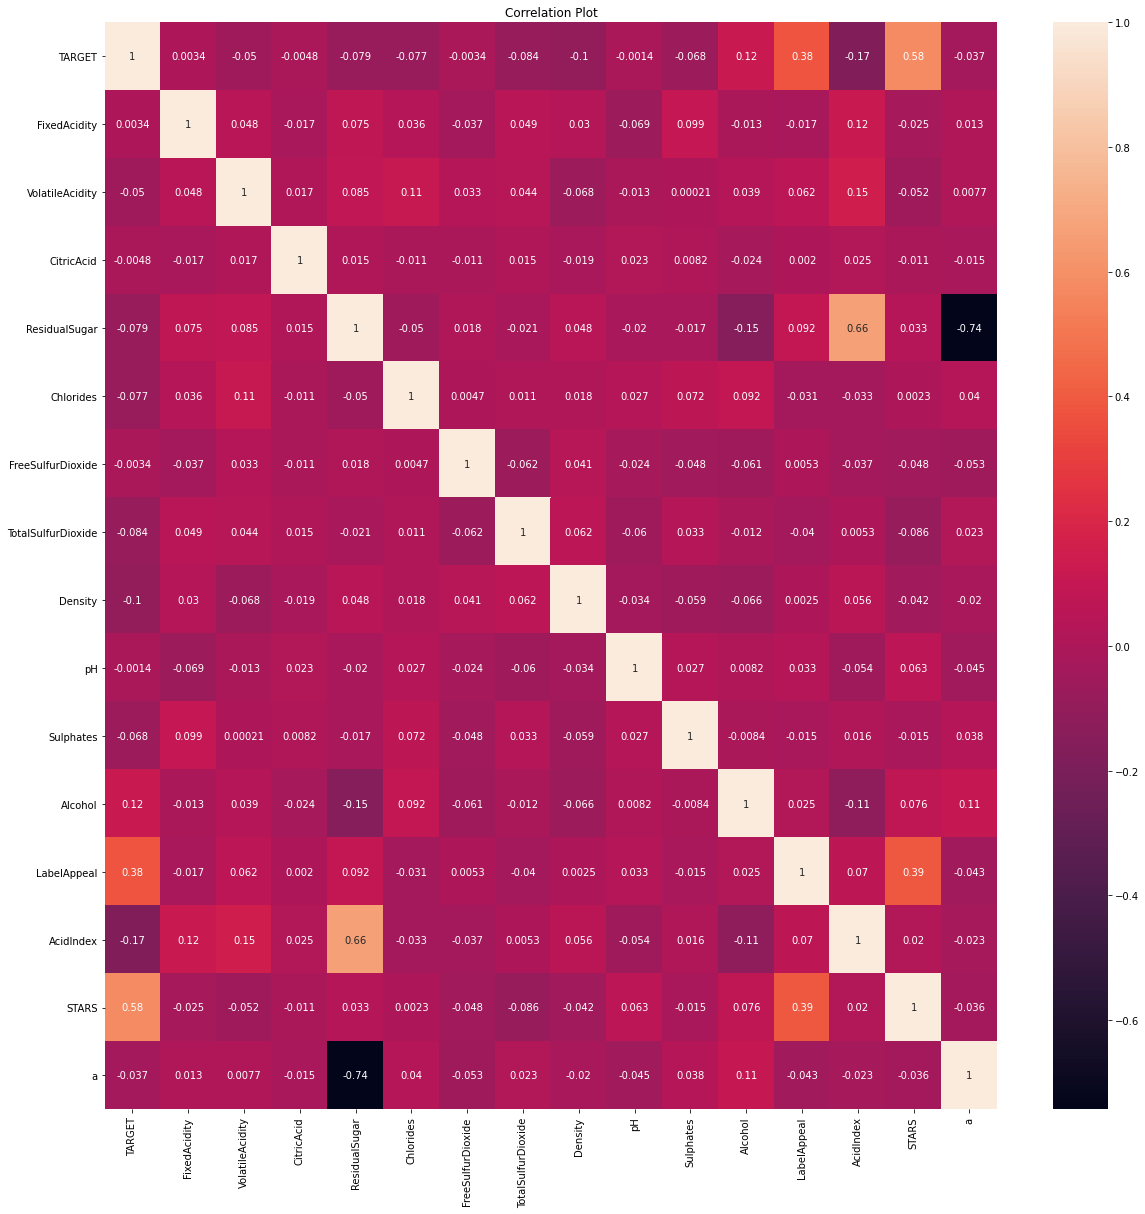

In [55]:
cor = df1.iloc[:,1:].corr()
plt.figure(figsize=(20,20))
plt.title("Correlation Plot")
sns.heatmap(cor,annot=True)
plt.show()

This filter changes the correlations, however most of them are not that storng

I’m going to get rid of most of the bad data and see what happens.

In [49]:
wine=df
df2=wine[(wine['FixedAcidity']>=0) & (wine['VolatileAcidity']>=0) & (wine['CitricAcid']>=0) & (wine['ResidualSugar']>=0)
        & (wine['Chlorides']>=0) & (wine['FreeSulfurDioxide']>=0)& (wine['TotalSulfurDioxide']>=0) & (wine['Density']>=0)
        & (wine['Sulphates']>=0) & (wine['Alcohol']>=0)].copy()
#create a copy of our dataset
positive=df2.copy()
#positive=positive.drop(['TARGET','INDEX','LabelAppeal','STARS'],axis=1)
#remove rows that have a volatile acidity above 1.4
positive=positive[positive.VolatileAcidity<=1.4]

#remove rows that have a total sulfur dioxide value above 350
positive=positive[(positive.TotalSulfurDioxide<=350)
                                                 | (positive.TotalSulfurDioxide.isnull()) ]

#remove rows that have a free sulfur dioxide value above 350
positive=positive[(positive.FreeSulfurDioxide<=350) | (positive.FreeSulfurDioxide.isnull())]

#remove rows that have a free sulfur dioxide values less than the total sulfur dioxide value for that data point
positive=positive[(positive.FreeSulfurDioxide<=positive.TotalSulfurDioxide) 
                              | (positive.FreeSulfurDioxide.isnull()) |(positive.TotalSulfurDioxide.isnull())]

#remove rows that have a pH less than 2 or greater than 5
positive=positive[((positive.pH >2) & (positive.pH<5))
                                                  | (positive.pH.isnull()) ]

#transform the label appeal by adding 2 to each of the values to create an attribute that is all positive.
#positive['LabelAppeal']=positive['LabelAppeal']+2

#check shape
positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 16 to 12780
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               555 non-null    int64  
 1   TARGET              555 non-null    int64  
 2   FixedAcidity        555 non-null    float64
 3   VolatileAcidity     555 non-null    float64
 4   CitricAcid          555 non-null    float64
 5   ResidualSugar       555 non-null    float64
 6   Chlorides           555 non-null    float64
 7   FreeSulfurDioxide   555 non-null    float64
 8   TotalSulfurDioxide  555 non-null    float64
 9   Density             555 non-null    float64
 10  pH                  534 non-null    float64
 11  Sulphates           555 non-null    float64
 12  Alcohol             555 non-null    float64
 13  LabelAppeal         555 non-null    int64  
 14  AcidIndex           555 non-null    int64  
 15  STARS               407 non-null    float64
dtypes: fl

I will also apply the filter

In [53]:
df3=positive
df3['a']= df1['AcidIndex']/df1['ResidualSugar']
df3=df3[(df3.a>1)]
df3=df3[(df3.a<2)]
df3=df3[(df3.pH>2.9)]
df3=df3[(df3.pH<3.3)]
                             
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 495 to 12410
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               31 non-null     int64  
 1   TARGET              31 non-null     int64  
 2   FixedAcidity        31 non-null     float64
 3   VolatileAcidity     31 non-null     float64
 4   CitricAcid          31 non-null     float64
 5   ResidualSugar       31 non-null     float64
 6   Chlorides           31 non-null     float64
 7   FreeSulfurDioxide   31 non-null     float64
 8   TotalSulfurDioxide  31 non-null     float64
 9   Density             31 non-null     float64
 10  pH                  31 non-null     float64
 11  Sulphates           31 non-null     float64
 12  Alcohol             31 non-null     float64
 13  LabelAppeal         31 non-null     int64  
 14  AcidIndex           31 non-null     int64  
 15  STARS               25 non-null     float64
 16  a    

This way only returns 31 values. Which is very small

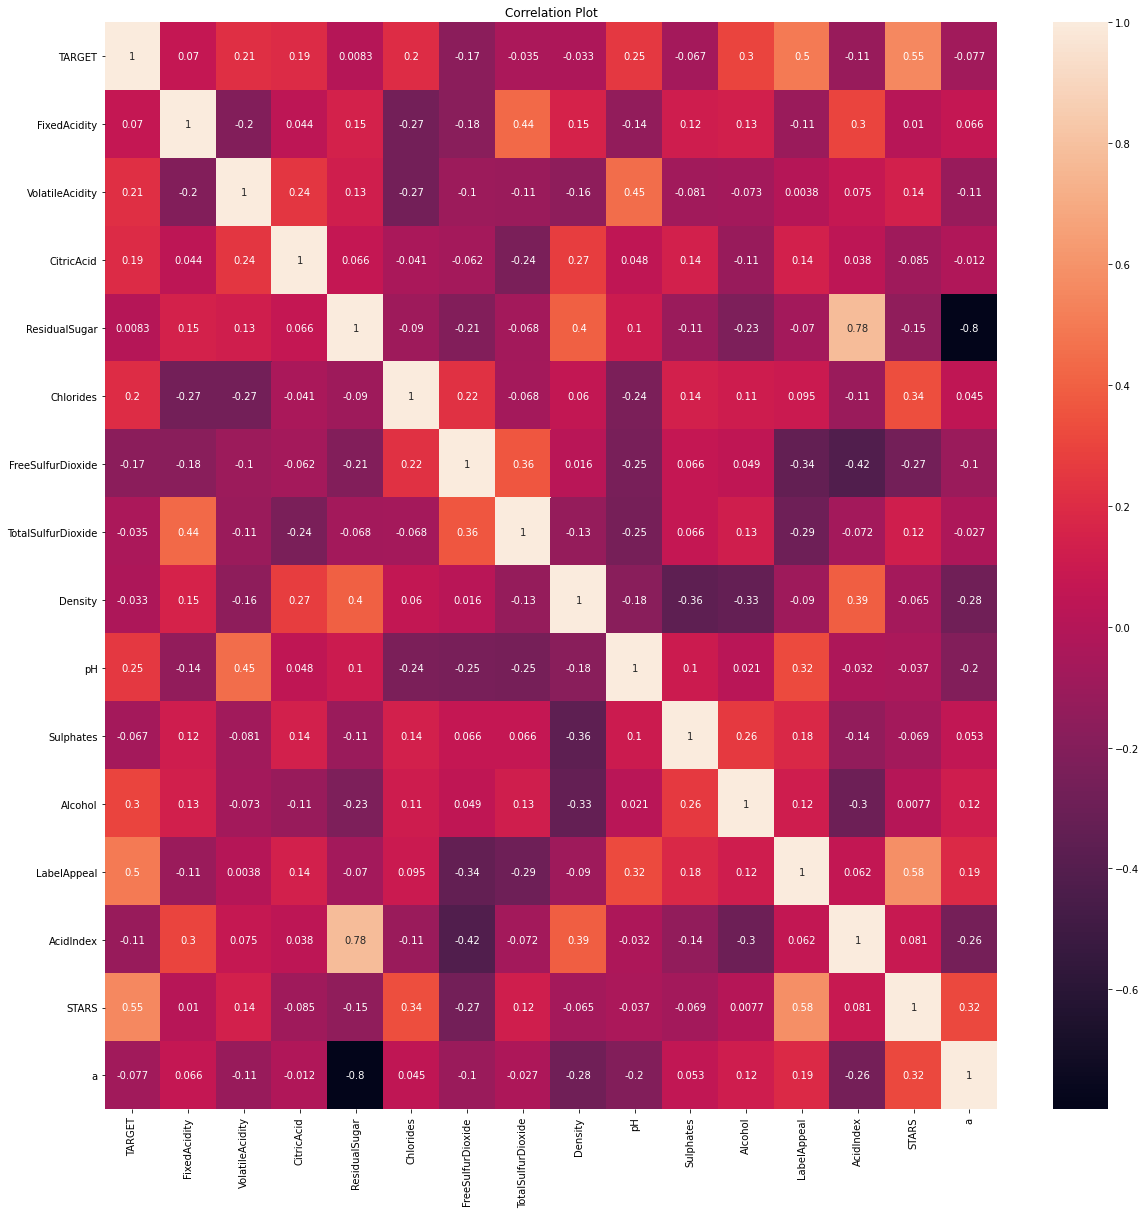

In [52]:
cor = df3.iloc[:,1:].corr()
plt.figure(figsize=(20,20))
plt.title("Correlation Plot")
sns.heatmap(cor,annot=True)
plt.show()

The correlations seem to slightly improve vs. df1, however this is a bad sample

I’m  going to check the distributions 

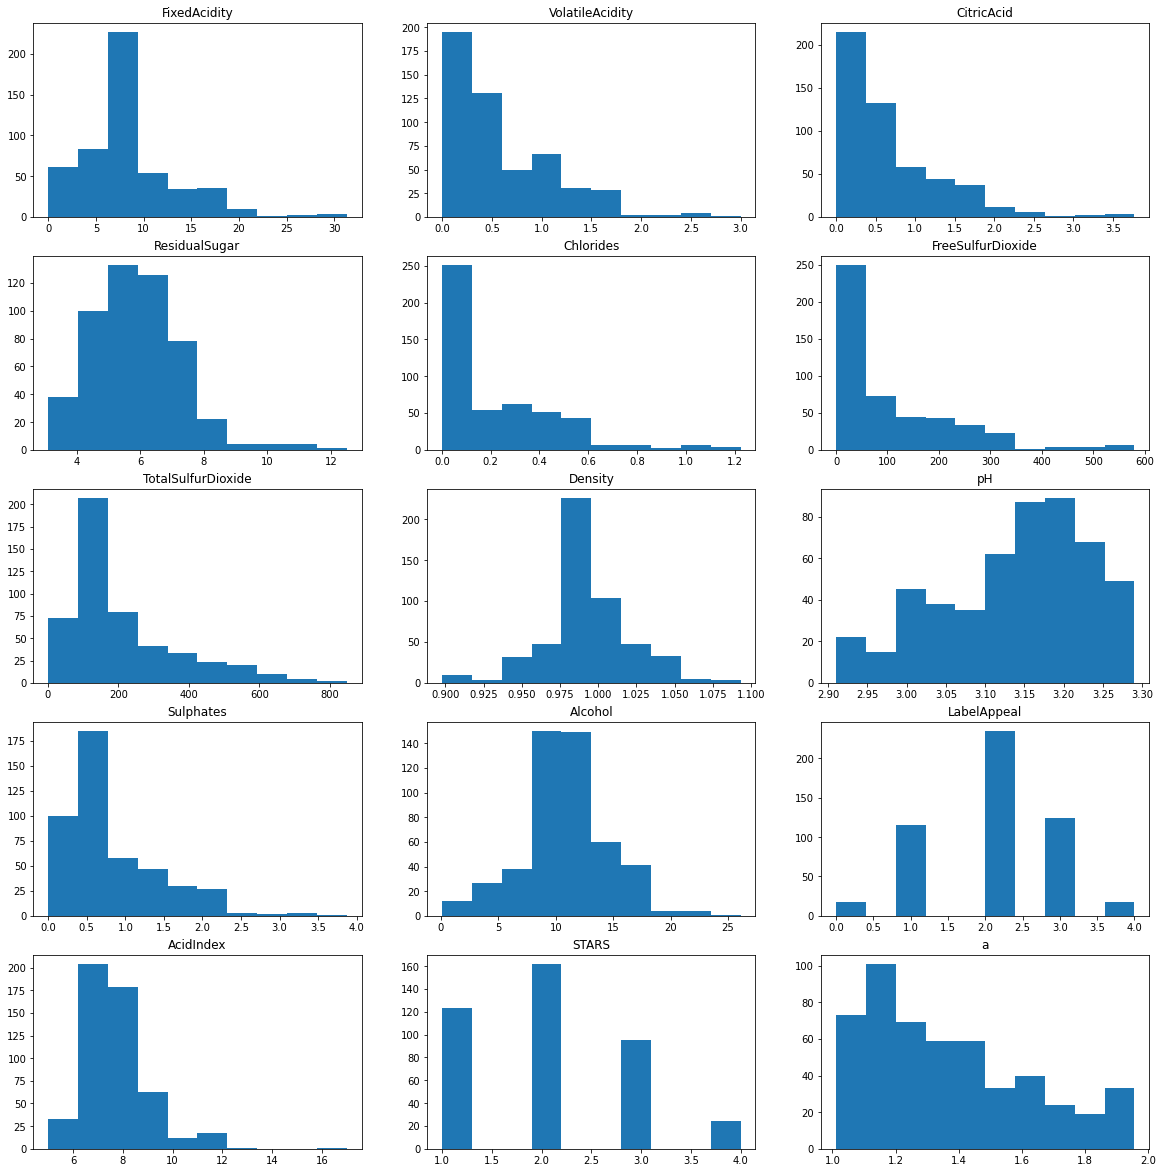

In [56]:
#next check how this transformation affected the distributions of our attributes
plt.figure(figsize=(20,25))

#need to use an index to identify the spot of the subplot
j=1
columns=df1.columns.tolist()
for k in columns[2:] :   #for each column in the dataframe
    plt.subplot(6,3,j) 
    plt.hist(df1[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space
#show results    
plt.show()


From looking at the histograms we see that the distributions for many of our attributes have changed after elimination steps, with attributes like volatile acidity, fixed acidity, citric acid, and others which previously had an approximately normal distribution now having a right skewed distribution. 

I’m also going to display the original box plot, to compare

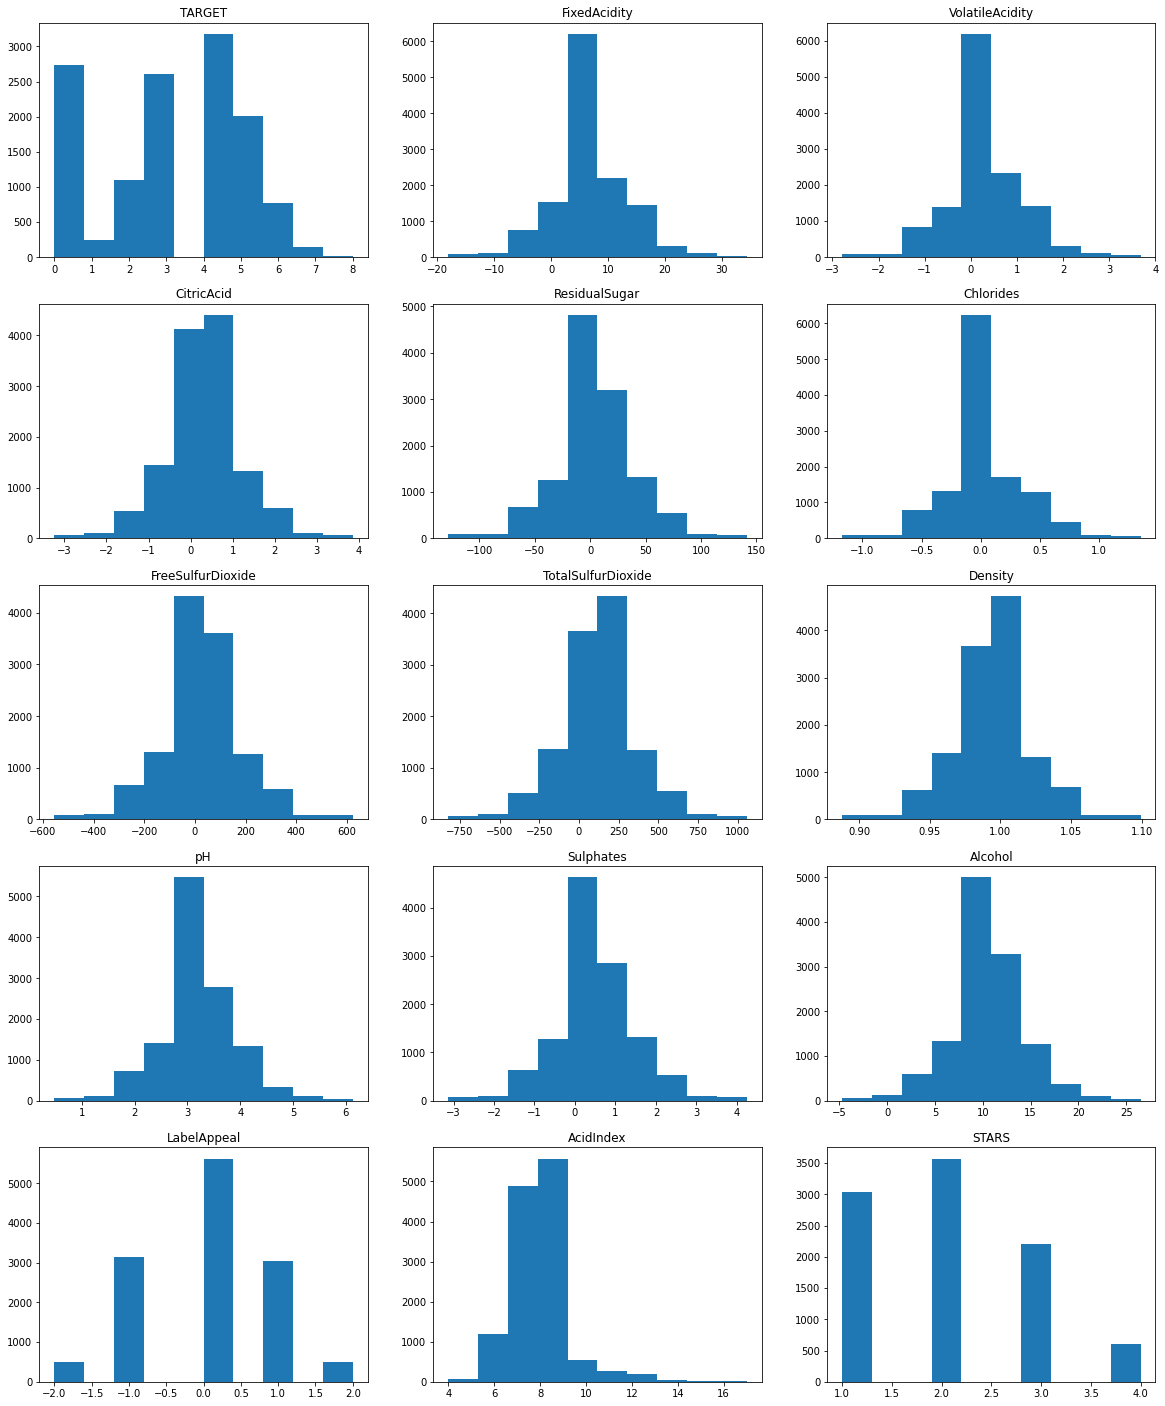

In [59]:
#next check how this transformation affected the distributions of our attributes
plt.figure(figsize=(20,25))
#use an index to identify the spot of the subplot
j=1
columns=df.columns.tolist()
for k in columns[1:] :   #for each column in the dataframe graph a histogram 
    plt.subplot(5,3,j) 
    plt.hist(df[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

#show results    
plt.show()

The original database was more normally distributed

## Conclusion
This data seems to be very bad; a lot of the numbers does not make sense and is wrong. You can play around with the numbers, however I am not sure how accurate it is, I wonder If I can somehow filter them by wine types, (red, white, etc.) and their sweetness, if the data will be easier to use. The way I filter by sweetness might only apply to that specific type of wine. So, it is not that good for the whole data set. 